In [1]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score, confusion_matrix ,ConfusionMatrixDisplay

In [2]:
df=pd.read_csv(r"C:\Users\PRASANTA\Downloads\survey_lung_cancer.csv")

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,MALE,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,MALE,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,FEMALE,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,MALE,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,FEMALE,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
df_new = df.drop(['GENDER','AGE', 'SMOKING', 'ALCOHOL CONSUMING', 'CHRONIC DISEASE', 'PEER_PRESSURE', 'ALLERGY '], axis = 1)
symptoms = [ 'YELLOW_FINGERS', 'ANXIETY', 'FATIGUE ',  'WHEEZING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']
 

In [6]:
X = df_new[symptoms]
y = df_new.LUNG_CANCER
X.head()

,YELLOW_FINGERS,ANXIETY,FATIGUE,WHEEZING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,1,1,1,1,1,1,1
1,0,0,1,0,0,1,1,1
2,0,0,1,1,1,1,0,1
3,1,1,0,0,0,0,1,1
4,1,0,0,1,1,1,0,0


In [7]:
y.head()

0    YES
1    YES
2     NO
3     NO
4     NO
Name: LUNG_CANCER, dtype: object

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state = 42)

Text(0.5, 1.0, 'AGE')

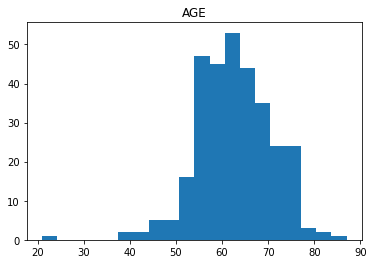

In [9]:
plt.hist(df['AGE'],bins=20)
plt.title('AGE')

In [10]:
gender_counts = df['GENDER'].value_counts()

Text(0.5, 0, 'gender')

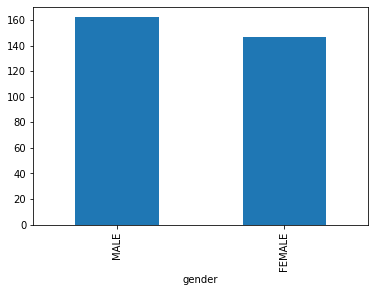

In [11]:
gender_counts.plot(kind='bar')
plt.xlabel('gender')

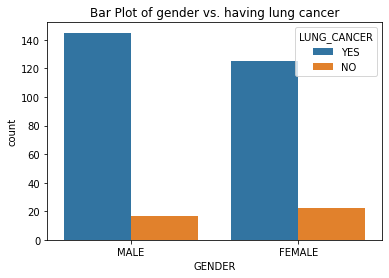

In [14]:
import seaborn as sns
sns.countplot(x='GENDER', hue='LUNG_CANCER', data=df)
plt.title('Bar Plot of gender vs. having lung cancer')
plt.show()

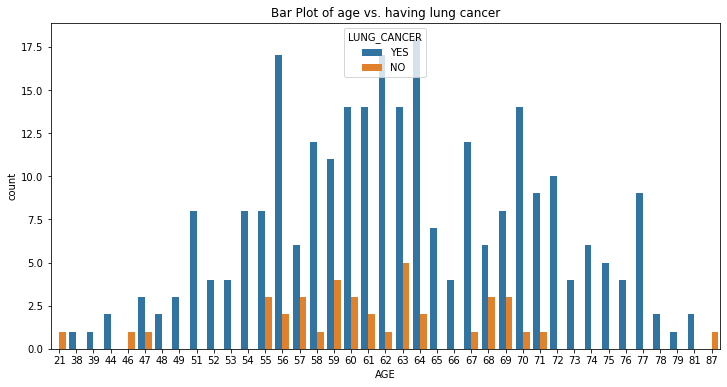

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x='AGE', hue='LUNG_CANCER', data=df)

plt.title('Bar Plot of age vs. having lung cancer')
plt.show()

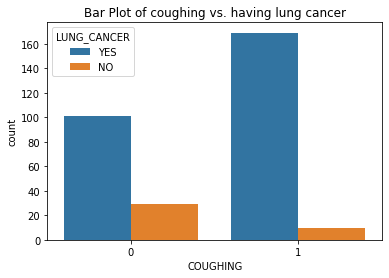

In [19]:
sns.countplot(x='COUGHING', hue='LUNG_CANCER', data=df)
plt.title('Bar Plot of coughing vs. having lung cancer')
plt.show()

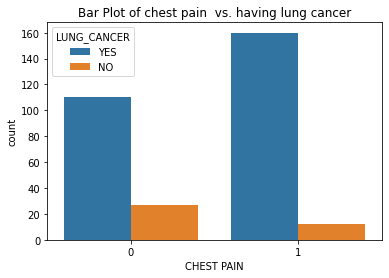

In [20]:
sns.countplot(x='CHEST PAIN', hue='LUNG_CANCER', data=df)
plt.title('Bar Plot of chest pain  vs. having lung cancer')
plt.show()

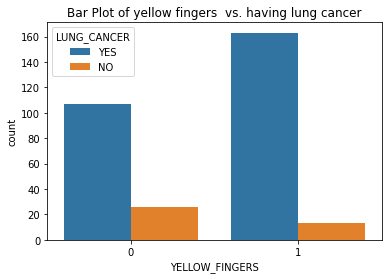

In [21]:
sns.countplot(x='YELLOW_FINGERS', hue='LUNG_CANCER', data=df)
plt.title('Bar Plot of yellow fingers  vs. having lung cancer')
plt.show()

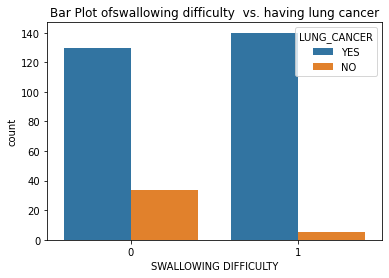

In [23]:
sns.countplot(x='SWALLOWING DIFFICULTY', hue='LUNG_CANCER', data=df)
plt.title('Bar Plot ofswallowing difficulty  vs. having lung cancer')
plt.show()

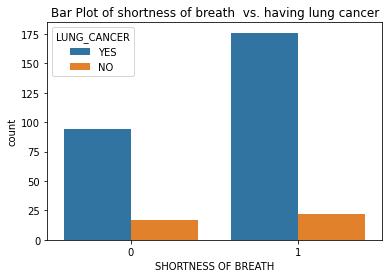

In [24]:
sns.countplot(x='SHORTNESS OF BREATH', hue='LUNG_CANCER', data=df)
plt.title('Bar Plot of shortness of breath  vs. having lung cancer')
plt.show()

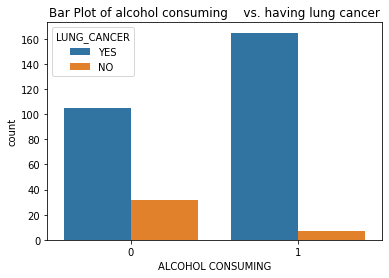

In [26]:
sns.countplot(x='ALCOHOL CONSUMING', hue='LUNG_CANCER', data=df)
plt.title('Bar Plot of alcohol consuming    vs. having lung cancer')
plt.show()

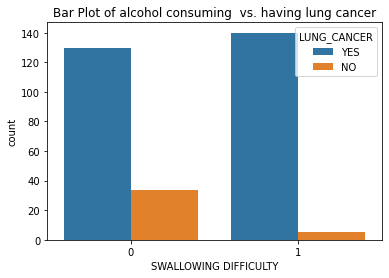

In [25]:
sns.countplot(x='SWALLOWING DIFFICULTY', hue='LUNG_CANCER', data=df)
plt.title('Bar Plot of alcohol consuming  vs. having lung cancer')
plt.show()

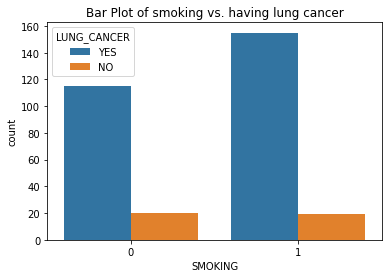

In [28]:

sns.countplot(x='SMOKING', hue='LUNG_CANCER', data=df)
plt.title('Bar Plot of smoking vs. having lung cancer')
plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state = 42)

In [30]:
model =  RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = model.predict(X_test)

In [34]:
print((100*accuracy_score(y_test, y_pred)))

93.58974358974359


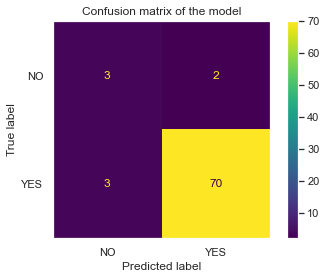

In [35]:
sns.set(rc = {'axes.grid':False})
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix of the model')
plt.show()